# Transformers

Label without target_transform: 9
Label with target_transform (one-hot): tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


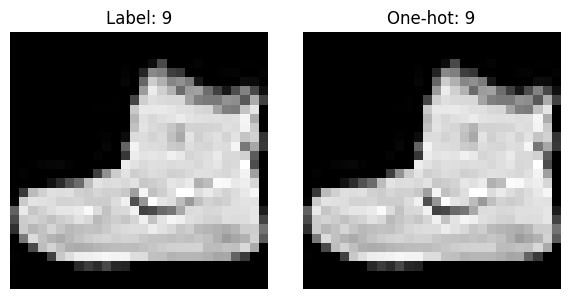

In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    # convert integer into one-hot encoder 
    # possible value is 0 - 9
    # use size (10,) of 0 and 1 value
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# Load FashionMNIST without target_transform
ds_no_transform = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# Show the first label with and without target_transform
img1, label1 = ds_no_transform[0]
img2, label2 = ds[0]  # ds uses target_transform

print("Label without target_transform:", label1)
print("Label with target_transform (one-hot):", label2)

# Visualize both
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(img1.squeeze(), cmap='gray')
axes[0].set_title(f"Label: {label1}")
axes[0].axis('off')

axes[1].imshow(img2.squeeze(), cmap='gray')
axes[1].set_title(f"One-hot: {label2.argmax().item()}")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# This cell is intentionally left blank or ready for new code.
The code uses a `target_transform` to convert integer labels into one-hot encoded tensors. 

- `ds_no_transform` returns the label as an integer (e.g., `9`).
- `ds` uses `target_transform`, which creates a tensor of zeros with length 10 and sets the index corresponding to the label to 1 (e.g., `[0, 0, ..., 1]` for label 9).

This is useful for training neural networks, as one-hot encoding is a common format for classification targets. The visualizations show that the image is the same, but the label format differs: integer vs. one-hot tensor.

In [7]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()